<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Cat_and_Dog_Data_Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all necessary
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import regular expressions
import re

In [ ]:
# Import CV-2 model for image handling
import cv2

In [ ]:
# Connect notebook to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_DIR = "/content/drive/MyDrive/Datasets/Pet Dataset/PetImages"
CATEGORIES = ["Dog", "Cat"]

In [ ]:
image_extensions = ["jpg", "jpeg", "png"]

for category in CATEGORIES:
  path = os.path.join(DATA_DIR, category) # Path to images of dogs or cats
  print(len(os.listdir(path)))

12539
12309


12539


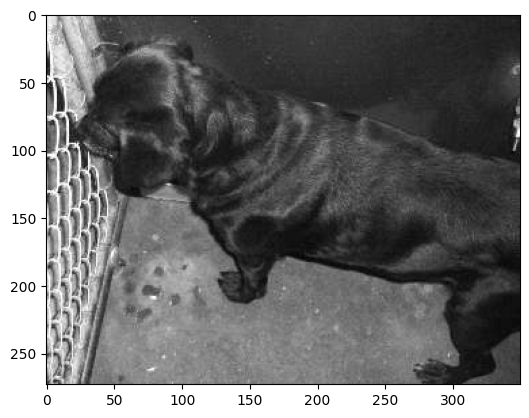

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DATA_DIR, category) # Path to images of dogs or cats
  print(len(os.listdir(path)))
  files = os.listdir(path)
  random.shuffle(files)
  for img in files:
    # Check extension of file
    if img.split(".")[1] not in image_extensions:
      continue
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break


(273, 350)


array([[248, 242, 244, ..., 107, 106, 106],
       [248, 243, 245, ..., 111, 111, 111],
       [247, 242, 245, ..., 109, 110, 111],
       ...,
       [142, 172, 158, ..., 131, 131, 132],
       [162, 111, 159, ..., 127, 126, 126],
       [155, 128, 180, ..., 123, 135, 134]], dtype=uint8)
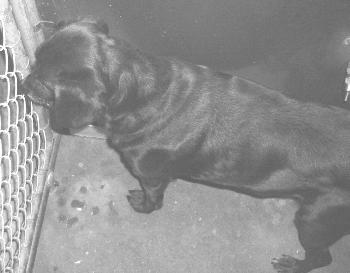

In [ ]:
print(img_array.shape)
img_array

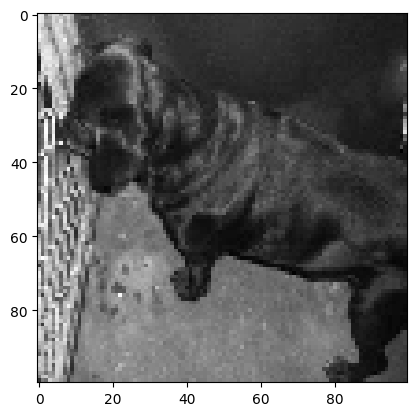

In [ ]:
# Resize the image to normalize
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
type(new_array)

numpy.ndarray

In [ ]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category) # Path to images of dogs or cats
    class_num = CATEGORIES.index(category)

    number_of_loaded_images = 0
    percentage_of_loaded_images = 0
    total_images = len(os.listdir(path))

    print(f"Loading images from {path}: ", end="")

    for img in os.listdir(path):
      # Check extension of file
      if img.split(".")[1] not in image_extensions:
        continue
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
        number_of_loaded_images += 1
        if ((number_of_loaded_images//total_images) * 100) != percentage_of_loaded_images:
          percentage_of_loaded_images = (number_of_loaded_images//total_images)*100
          print("#", end=" ")
      except:
        pass

In [ ]:
# create training data
create_training_data()

Loading images from /content/drive/MyDrive/Datasets/Pet Dataset/PetImages/Dog: Loading images from /content/drive/MyDrive/Datasets/Pet Dataset/PetImages/Cat: 

In [ ]:
len(training_data)

24794

In [ ]:
training_data[0]

[array([[48, 49, 47, ...,  7, 10, 13],
        [49, 52, 50, ..., 53, 16, 10],
        [52, 50, 51, ..., 47, 50, 18],
        ...,
        [24, 22, 25, ..., 47, 61, 41],
        [24, 22, 18, ..., 55, 44, 46],
        [27, 24, 15, ..., 44, 50, 53]], dtype=uint8),
 0]

In [ ]:
# shuffle all input data
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
0
1
1
0
0
0
1
0
0


In [ ]:
for features, label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
# Convert X from list to numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle

pickle_out = open("/content/drive/MyDrive/Datasets/Pet Dataset/petsX.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Datasets/Pet Dataset/petsY.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("/content/drive/MyDrive/Datasets/Pet Dataset/petsX.pickle", "rb")
X = pickle.load(pickle_in)

In [ ]:
pickle_in = open("/content/drive/MyDrive/Datasets/Pet Dataset/petsY.pickle", "rb")
Y = pickle.load(pickle_in)

In [ ]:
X.shape

(24794, 100, 100, 1)

In [ ]:
len(Y)

24794

In [ ]:
X[0], Y[0]

(array([[[208],
         [208],
         [211],
         ...,
         [ 76],
         [129],
         [223]],
 
        [[203],
         [203],
         [203],
         ...,
         [ 79],
         [165],
         [230]],
 
        [[199],
         [199],
         [200],
         ...,
         [ 83],
         [191],
         [230]],
 
        ...,
 
        [[237],
         [237],
         [237],
         ...,
         [248],
         [248],
         [248]],
 
        [[237],
         [237],
         [238],
         ...,
         [248],
         [248],
         [248]],
 
        [[237],
         [237],
         [238],
         ...,
         [248],
         [248],
         [248]]], dtype=uint8),
 1)

In [ ]:
np.count_nonzero(Y)

12286

In [ ]:
count_of_dogs = 0
count_of_cats = 0
for label in Y:
  if label == 0:
    count_of_dogs += 1
  else:
    count_of_cats += 1

In [ ]:
count_of_dogs, count_of_cats

(12508, 12286)

1


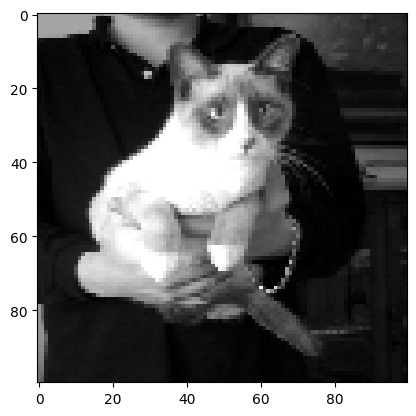

In [ ]:
print(Y[993])
plt.imshow(X[993], cmap="gray")
plt.show()